In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from yellowbrick.classifier import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [2]:
df = pd.read_excel('datasets/New Microsoft Excel Worksheet.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [4]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
maxage= df[df['Age'] > 70].index
df1 = df.drop(maxage , inplace=True)
maxage

Int64Index([   81,   183,   575,   747, 32297, 32355, 32381, 32416, 32422,
            32432, 32506, 32521, 32534],
           dtype='int64')

In [6]:
maxemp = df[df['Emp_length']> 100].index
df2 = df.drop(maxemp , inplace=True)
maxemp

Int64Index([0, 210], dtype='int64')

In [7]:
df[['Age', 'Emp_length']].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,32566.0,27.705859,6.152800,20.0,23.0,26.0,30.0,70.0
Emp_length,31671.0,4.780714,4.028718,0.0,2.0,4.0,7.0,38.0


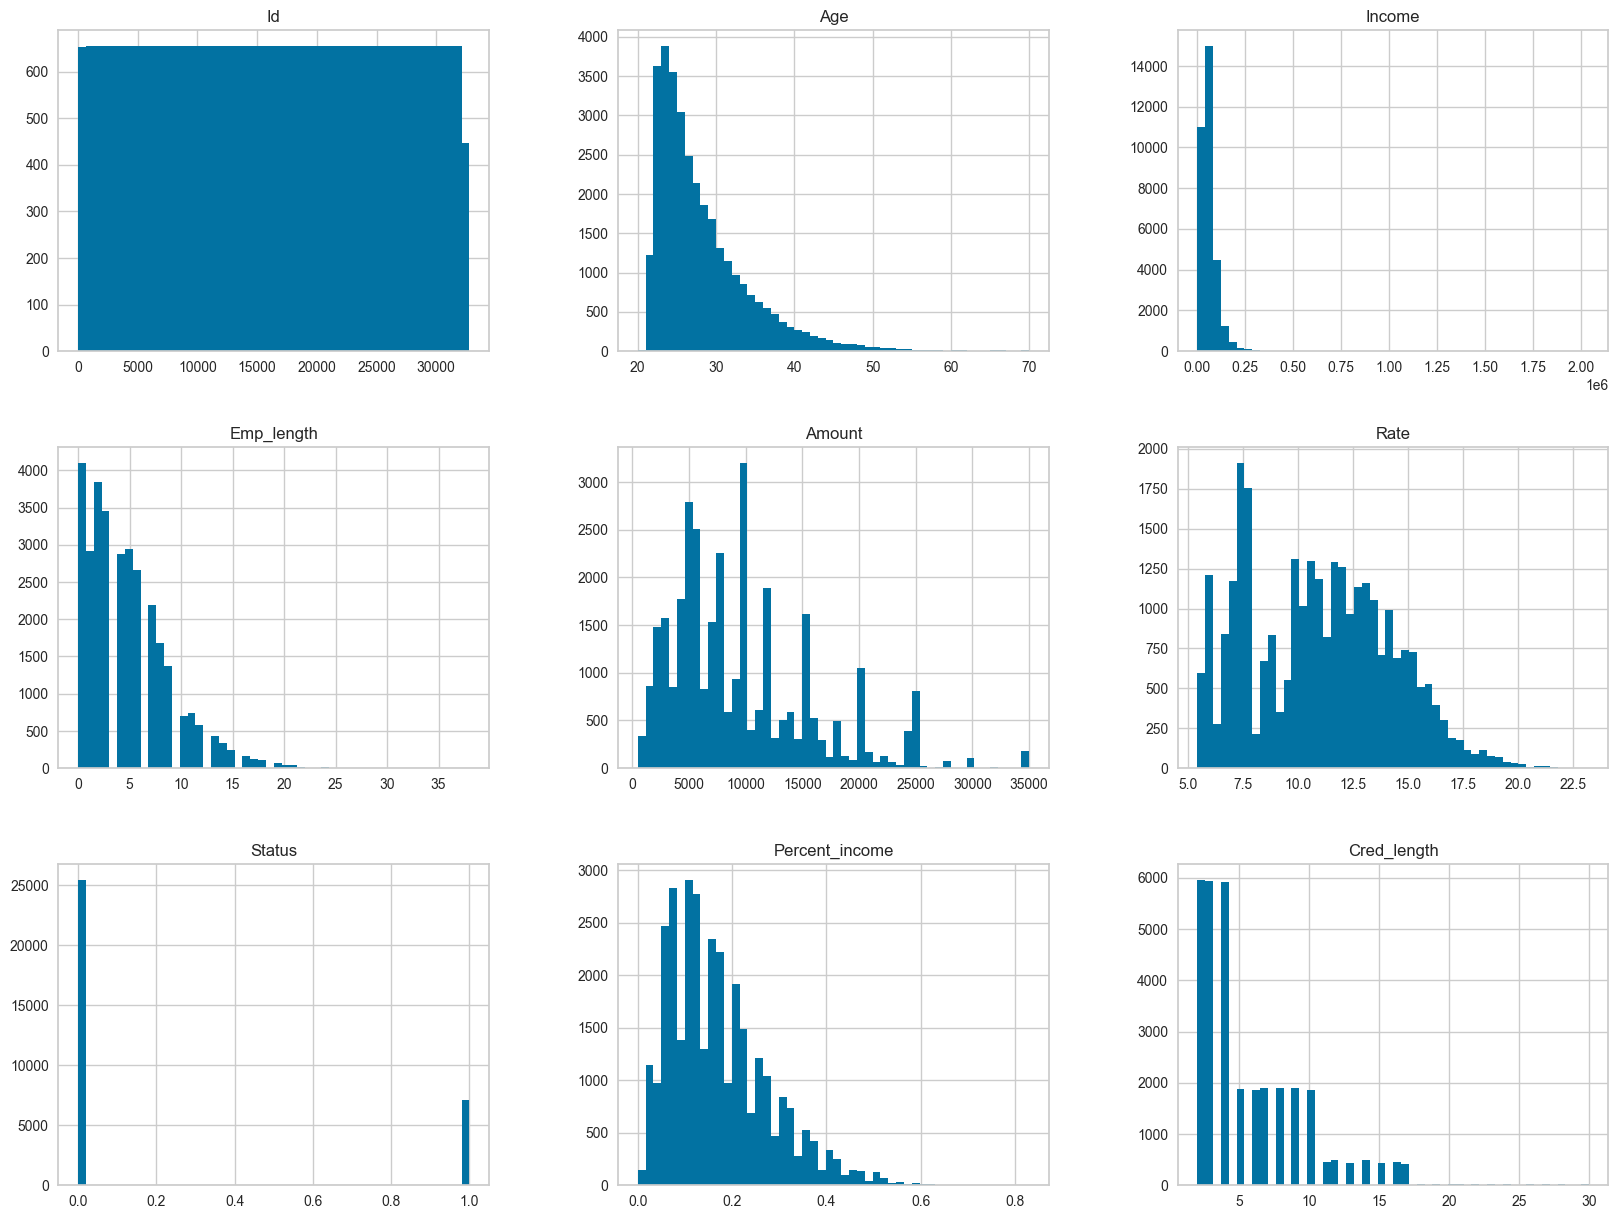

In [8]:
df.hist(bins=50, figsize=(20,15)) 
plt.show()

In [9]:
df = pd.get_dummies(df)

In [10]:
corr_matrix = df.corr()
corr_matrix["Status"].sort_values(ascending=False)

Status                      1.000000
Percent_income              0.379238
Rate                        0.335067
Home_RENT                   0.238517
Default_Y                   0.178952
Amount                      0.105198
Intent_DEBTCONSOLIDATION    0.071487
Intent_MEDICAL              0.056795
Intent_HOMEIMPROVEMENT      0.036552
Home_OTHER                  0.012535
Cred_length                -0.014903
Age                        -0.019786
Intent_PERSONAL            -0.021205
Intent_EDUCATION           -0.055366
Id                         -0.060090
Intent_VENTURE             -0.078253
Emp_length                 -0.085937
Home_OWN                   -0.102023
Income                     -0.168515
Default_N                  -0.178952
Home_MORTGAGE              -0.187677
Name: Status, dtype: float64

In [11]:
y = df['Status']

In [12]:
credit_predictors = df.drop(['Status'], axis=1)
X = credit_predictors.select_dtypes(exclude=['object'])

In [13]:
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size = 0.2, random_state = 2)
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(train_X))
imputed_X_valid = pd.DataFrame(my_imputer.transform(val_X))

In [14]:
rf_model = RandomForestClassifier()
rf_model.fit(imputed_X_train, train_y)
rf_preds = rf_model.predict(imputed_X_valid)
rf_acerto = accuracy_score(val_y, rf_preds)
rf_acerto
acerto = 100*rf_acerto
acerto
print(f" Accuracy of Random Forest is {acerto.round(2)} %")

 Accuracy of Random Forest is 92.19 %


(<Figure size 800x550 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

<Figure size 800x550 with 0 Axes>

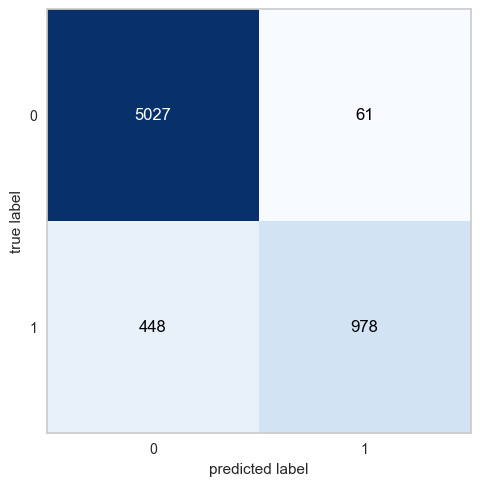

In [15]:
m = confusion_matrix(val_y, rf_preds)
plt.figure()
plot_confusion_matrix(m)


In [16]:
import joblib 
joblib.dump(rf_model, "model.pkl")


['model.pkl']

In [17]:
import joblib
model = joblib.load('model.pkl')
new_data = np.array([1564.00,50.00,75000.00,4.00,30000.00,20.01,0.20,500,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00])
model.predict(new_data.reshape(1,-1))

array([1], dtype=int64)

In [18]:
print(new_data)

[1.564e+03 5.000e+01 7.500e+04 4.000e+00 3.000e+04 2.001e+01 2.000e-01
 5.000e+02 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00]


In [19]:
print(new_data.shape)

(20,)


In [20]:
new_data.reshape(1,-1).shape

(1, 20)

In [21]:
np.array(val_X.iloc[0:1]).shape


(1, 20)